In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
documents = ["There were slight scratches on camera glass of Oneplus8. It was like a refurbished product.", 
            "Oneplus8 Front Camera Defect. Raised Complaint against this but no response.", 
            "The Cameras, they are actually Flagship level this Oneplus8.", 
            "As soon as u open the camera Samsung S21 heats up, Waste of money.", 
            "I would say this Samsung S21 is one of the best smartphone display I have ever seen.",
            "Everything is awesome except the weight of Samsung S21."]

In [3]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(documents)

In [4]:
terms = vectorizer.get_feature_names()
from sklearn.metrics.pairwise import cosine_similarity
dist = 1- cosine_similarity(X)

D:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


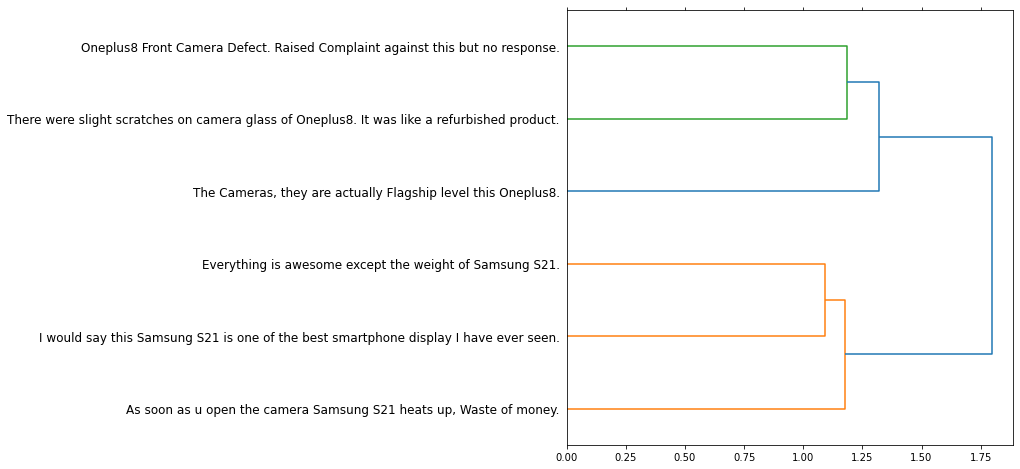

In [11]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist)
fig, ax = plt.subplots(figsize=(8, 8)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels = documents);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

In [6]:
model = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 1)
model.fit(X)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [7]:
# top ten terms/words per cluster
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(2):
    print("Cluster Number:", i), 
    for c in order_centroids[i, :10]: 
        print('%s' % terms[c])

Cluster Number: 0
samsung
s21
weight
awesome
display
smartphone
seen
best
say
open
Cluster Number: 1
oneplus8
camera
level
cameras
flagship
actually
response
raised
complaint
defect


In [8]:
Y = vectorizer.transform(["SJCC class of Python"])
model.predict(Y)

array([1])